In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

Using TensorFlow backend.


### Load the Data

In [2]:
breast_cancer = load_breast_cancer()
data = pd.DataFrame(breast_cancer["data"], columns=breast_cancer["feature_names"])
target = breast_cancer["target"]
target = np.column_stack((target.astype(bool),~target.astype(bool)))

In [3]:
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.values, target, test_size=0.3)

learning_rate = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, [None, 30])
y_ = tf.placeholder(tf.float32, [None, 2])


W1 = tf.Variable(tf.random_normal([30, 300],stddev=.35))
b1 = tf.Variable(tf.random_normal([300],stddev=.35))

h = tf.nn.tanh(tf.matmul(x, W1) + b1)
W2 = tf.Variable(tf.random_normal([300, 2],stddev=.35))
b2 = tf.Variable(tf.random_normal([2],stddev=.35))

y = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
y = tf.nn.softmax(y)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

rate = 1e-4
loss = []
acc = []
print "Epoch\tLoss\tAccuracy"
for i in range(15000): 
    batch_xs, batch_ys = X_train, y_train
    _,l = sess.run([train_step,cross_entropy], feed_dict={learning_rate: rate,x: batch_xs, y_: batch_ys})
    acc.append(sess.run(accuracy, feed_dict={x: X_test, y_: y_test}))
    loss.append(l)
    if i % 1000==0:
        print i, '\t', l, '\t', acc[-1]


Epoch	Loss	Accuracy
0 	0.664943 	0.619883
1000 	0.385002 	0.900585
2000 	0.373339 	0.906433
3000 	0.363104 	0.912281
4000 	0.354538 	0.906433
5000 	0.347091 	0.906433
6000 	0.339632 	0.918129
7000 	0.335034 	0.923977
8000 	0.331653 	0.929825
9000 	0.328612 	0.929825
10000 	0.326854 	0.929825
11000 	0.32533 	0.929825
12000 	0.324183 	0.929825
13000 	0.323154 	0.923977
14000 	0.322352 	0.923977


In [5]:
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy")
plt.title("Loss Function")
plt.show()

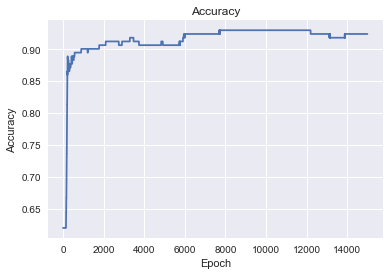

Final Accuracy:  0.923977


In [6]:
plt.plot(acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()
print "Final Accuracy: ", acc[-1]

## Comparison to scikit-learn's MLPClassifier
I have done my best to replicate the architecture in both models.

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(300), activation='tanh', 
                    learning_rate_init=1e-4, solver='adam', tol=0,
                    max_iter=15000, verbose=1)
mlp.fit(X_train, y_train[:,0])
(mlp.predict(X_test) == y_test[:,0]).mean()

Iteration 1, loss = 0.81705218
Iteration 2, loss = 0.78045790
Iteration 3, loss = 0.74637209
Iteration 4, loss = 0.71130083
Iteration 5, loss = 0.67843180
Iteration 6, loss = 0.64622957
Iteration 7, loss = 0.61700720
Iteration 8, loss = 0.59112750
Iteration 9, loss = 0.56548733
Iteration 10, loss = 0.54351139
Iteration 11, loss = 0.52423275
Iteration 12, loss = 0.50517139
Iteration 13, loss = 0.48936795
Iteration 14, loss = 0.47458062
Iteration 15, loss = 0.46174207
Iteration 16, loss = 0.44978401
Iteration 17, loss = 0.43896437
Iteration 18, loss = 0.42893608
Iteration 19, loss = 0.41996981
Iteration 20, loss = 0.41181312
Iteration 21, loss = 0.40400189
Iteration 22, loss = 0.39686676
Iteration 23, loss = 0.39046570
Iteration 24, loss = 0.38496638
Iteration 25, loss = 0.37984445
Iteration 26, loss = 0.37490207
Iteration 27, loss = 0.37055126
Iteration 28, loss = 0.36617104
Iteration 29, loss = 0.36146456
Iteration 30, loss = 0.35664132
Iteration 31, loss = 0.35246996
Iteration 32, los

0.90058479532163738

As you can see, MLPClassifier has an early stopping condition that prevents it from finishing all 15000 epochs.

## Comparison to Different Architecture in Keras
Keras is a user-friendly wrapper on top of Tensorflow. The following is an approximately equivalent architecture.

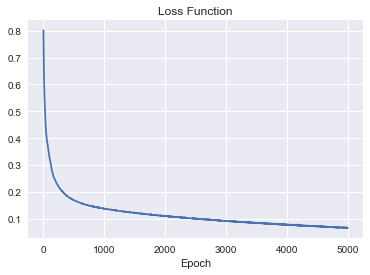

Final Accuracy: 0.941520467836


In [8]:
model = Sequential()
model.add(Dense(300, input_dim=30, init='normal', activation='tanh'))
model.add(Dense(1, init='normal', activation='sigmoid'))

adam = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X_train, y_train[:,0], nb_epoch=5000, verbose=0)

plt.plot(history.history["loss"])
plt.title("Loss Function")
plt.xlabel("Epoch")
plt.show()

print "Final Accuracy:", ((model.predict(X_test).flatten() > .5) == y_test[:,0]).mean()

I had to cut down on the number of epochs due to the amount of time each epoch was taking. This is using a slightly different cost function, which may be the cause for the slow down.

## Comparison to Different Architecture
I added another hidden layer with 300 neurons.

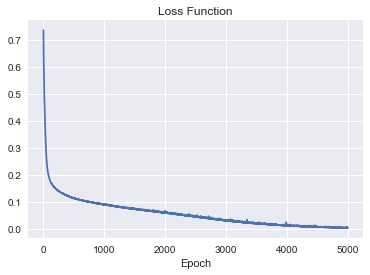

Final Accuracy: 0.947368421053


In [9]:
model = Sequential()
model.add(Dense(300, input_dim=30, init='normal', activation='tanh'))
model.add(Dense(300, init='normal', activation='tanh'))
model.add(Dense(1, init='normal', activation='sigmoid'))

adam = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X_train, y_train[:,0], nb_epoch=5000, verbose=0)

plt.plot(history.history["loss"])
plt.title("Loss Function")
plt.xlabel("Epoch")
plt.show()

print "Final Accuracy:", ((model.predict(X_test).flatten() > .5) == y_test[:,0]).mean()

## Final Results:
#### Accuracies:
- Tensorflow: 0.923977
- MLPClassifier: 0.900584
- Keras 1: 0.94152
- Keras 2: 0.94736

#### Timings:
- Tensorflow: 34.9 s
- MLPClassifier: 2.24 s
- Keras 1: 130 s 
- Keras 2: 184 s

I'm not sure why there is a much worse timing when using Keras. The only thing that was different was using a built in binary cross entropy function instead of specifying my own. If computation time isn't at issue, then the extra time is worth it to get a few percentage points more of accuracy.

However, XGBoost still reigns supreme for this problem.